# EDA

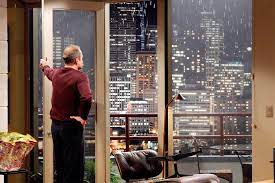

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv(".\data\King_County_House_prices_dataset.csv")

df_copy=df.copy()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.columns[df.isna().any()].tolist()

['waterfront', 'view', 'yr_renovated']

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [48]:
def replace_outliers_with_mean(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        if col=='id':
            continue
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        mean_value = df[col].mean()
        
        # Replace outliers with the mean
        df[col] = df[col].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    return df

# Replace outliers in the DataFrame
data = replace_outliers_with_mean(df.select_dtypes('number')[:])

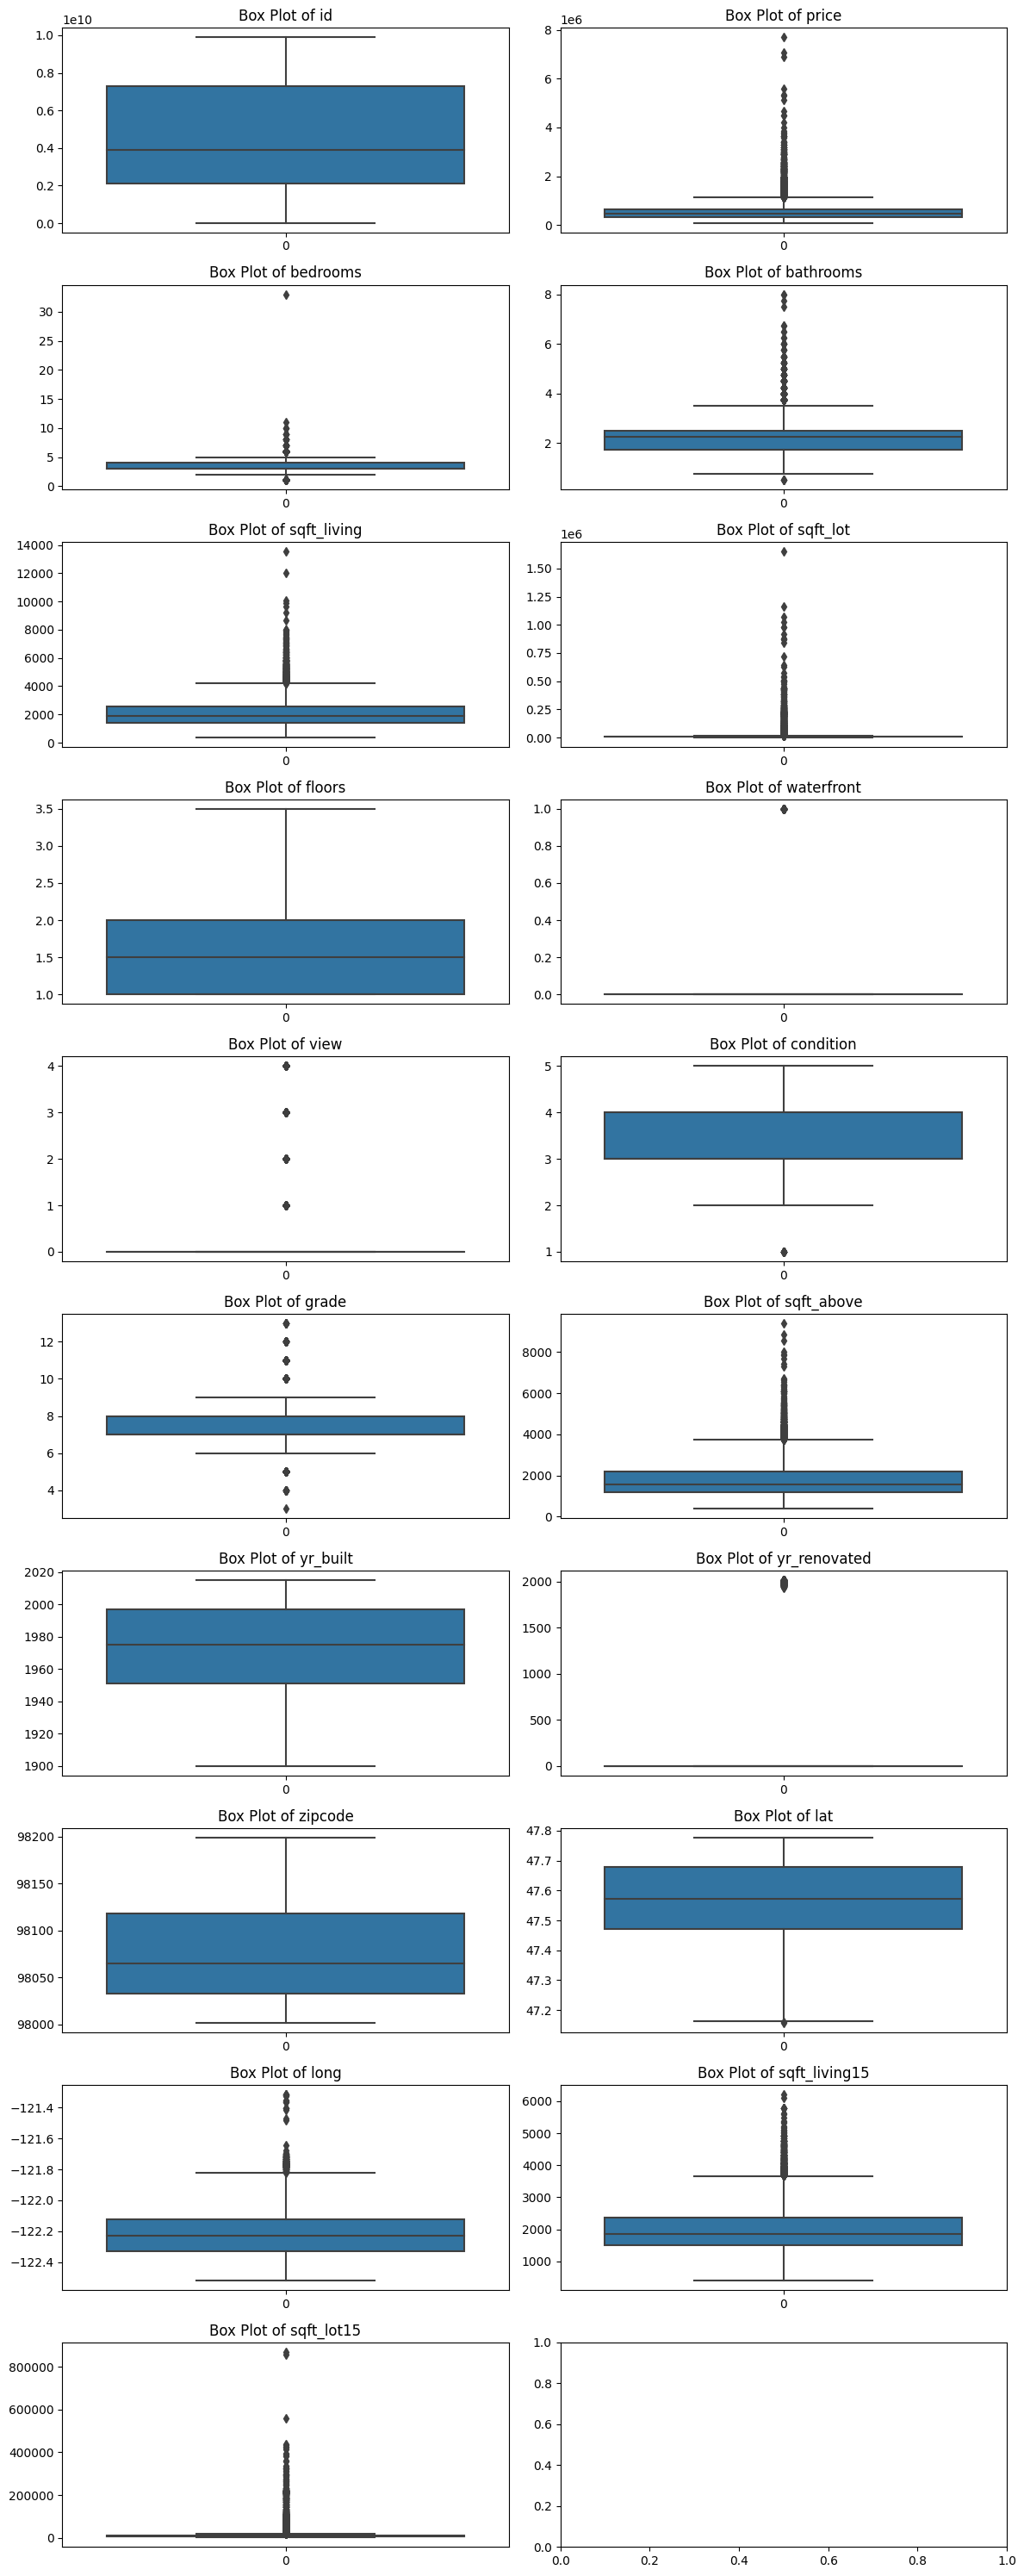

In [47]:
fig, axes = plt.subplots(10, 2, figsize=(12, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(df.select_dtypes('number').columns):
    sns.boxplot(data=data[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
df.rename({"date":"sold_date"},axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   sold_date      21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [8]:
df["sqft_basement"].value_counts().unique

<bound method Series.unique of sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64>

In [9]:
df[df.sqft_basement=="?"]

,id,sold_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,3,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
18,16000397,2014-12-05,189000.000,2,1.000,1200,9850,1.000,0.000,0.000,4,7,1200,?,1921,0.000,98002,47.309,-122.210,1060,5095
42,7203220400,2014-07-07,861990.000,5,2.750,3595,5639,2.000,0.000,0.000,3,9,3595,?,2014,0.000,98053,47.685,-122.016,3625,5639
79,1531000030,2015-03-23,720000.000,4,2.500,3450,39683,2.000,0.000,0.000,3,10,3450,?,2002,0.000,98010,47.342,-122.025,3350,39750
112,2525310310,2014-09-16,272500.000,3,1.750,1540,12600,1.000,0.000,0.000,4,7,1160,?,1980,0.000,98038,47.362,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,2014-07-11,504600.000,5,3.000,2360,5000,1.000,0.000,0.000,3,7,1390,?,2008,0.000,98103,47.693,-122.330,2180,5009
21447,1760650900,2014-07-21,337500.000,4,2.500,2330,4907,2.000,0.000,0.000,3,7,2330,?,2013,NaN,98042,47.359,-122.081,2300,3836
21473,6021503707,2015-01-20,352500.000,2,2.500,980,1010,3.000,NaN,0.000,3,8,980,?,2008,0.000,98117,47.684,-122.387,980,1023
21519,2909310100,2014-10-15,332000.000,4,2.500,2380,5737,2.000,0.000,0.000,3,7,2380,?,2010,0.000,98023,47.282,-122.356,2380,5396


In [10]:

df.loc[df.sqft_basement=="?",'sqft_basement']=df.sqft_living-df.sqft_above


#Dublicate

In [11]:
print(df.duplicated().value_counts())
df = df.drop_duplicates()
# reset index inplace
df.reset_index(inplace=True, drop=True)

print(df.duplicated().value_counts())
df.head()


False    21597
Name: count, dtype: int64


False    21597
Name: count, dtype: int64


,id,sold_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


<class 'pandas.core.series.Series'>
Index: 2376 entries, 0 to 21595
Series name: waterfront
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 37.1 KB


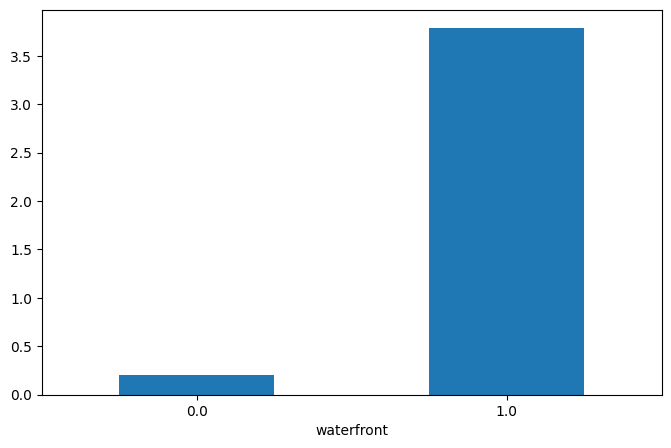

In [12]:
nan_rows = df.loc[df['waterfront'].isnull(),'waterfront']
#ax = df.plot.bar(x='waterfront', y='price', rot=0)
df.groupby(["waterfront"])["view"].mean().plot.bar(x='waterfront', y='view', rot=0)
nan_rows.info()


In [13]:
distincs=df["waterfront"].value_counts().to_dict()
df_before=df.copy()
distincs

{0.0: 19075, 1.0: 146}

In [14]:
def replace_rnd_by_value_chance(unique_dic:dict,nan_count):
    nan_series=np.zeros(nan_count)
    def_values=list(unique_dic.values())
    def_keys=list(unique_dic.keys())
    def_percent=np.zeros(len(def_values))
    for c,v in enumerate(def_values):
        def_percent[c]=v/sum(def_values)
    for ser_c,_ in enumerate(nan_series):
        rand_num=np.random.rand()
        cumulative=0.
        for c,v in enumerate(def_percent):
            if(rand_num<=def_percent[c]+cumulative and rand_num >=cumulative):
                nan_series[ser_c]=def_keys[c]
                
            cumulative+=def_percent[c]
    return nan_series    

df=df_before.copy()
not_null_count=df["waterfront"].value_counts().unique()
guessed_value=replace_rnd_by_value_chance(distincs,len(df.loc[df['waterfront'].isnull()]))
#df[df['waterfront'].isnull()].waterfront=guessed_value
df.loc[df['waterfront'].isnull(),'waterfront']=guessed_value
len(df.loc[df['waterfront'].isnull(),'waterfront']),len(guessed_value)



(0, 2376)

In [15]:
df.loc[df['waterfront'].isnull(),'waterfront'].info()

<class 'pandas.core.series.Series'>
Index: 0 entries
Series name: waterfront
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 0.0 bytes


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   sold_date      21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [17]:
df["bathrooms"]= df["bathrooms"].astype(int)
df["waterfront"]= df["waterfront"].astype(bool)
df["floors"]= df["floors"].astype(int)
df["view"]= df["view"].fillna(df["view"].mean()).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   sold_date      21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  int32         
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  int32         
 8   waterfront     21597 non-null  bool          
 9   view           21597 non-null  int32         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [18]:
df.columns[df.isna().any()].tolist()

['yr_renovated']

In [19]:
df.loc[df['yr_renovated']!=0.,['yr_built']].value_counts()

yr_built
2014        102
1968         85
1977         84
2003         78
2008         75
           ... 
1917         10
2015         10
1904          9
1901          7
1902          7
Name: count, Length: 116, dtype: int64

In [20]:

df_yr_built=np.where((df['yr_built'] > df["yr_renovated"] )& df["yr_renovated"]!=0, df['yr_renovated'], df['yr_built'])
df_yr_renovated=np.where((df['yr_renovated'] < df["yr_built"] )& df["yr_renovated"]!=0, df['yr_built'], df['yr_renovated'])
df.yr_built=df_yr_built
df.yr_renovated=df_yr_renovated
df.loc[df.yr_renovated-df.yr_built<0,['yr_renovated','yr_built']]

,yr_renovated,yr_built
0,0.000,1955.000
3,0.000,1965.000
4,0.000,1987.000
5,0.000,2001.000
6,0.000,1995.000
...,...,...
21592,0.000,2009.000
21593,0.000,2014.000
21594,0.000,2009.000
21595,0.000,2004.000


In [21]:

df_temp=df[df['yr_renovated']!=0]
br_mean=(df_temp.yr_renovated-df_temp.yr_built).mean()
df.yr_renovated.fillna(0.,inplace=True)

df['need_renovation'] = np.where((df.yr_renovated==0.) & (df.yr_built+br_mean< datetime.today().year), True,False )
df.loc[df['need_renovation']==True,['need_renovation','yr_renovated','yr_built']]

,need_renovation,yr_renovated,yr_built
0,True,0.000,1955.000
2,True,0.000,1933.000
3,True,0.000,1965.000
7,True,0.000,1963.000
8,True,0.000,1960.000
...,...,...,...
21287,True,0.000,1959.000
21316,True,0.000,1920.000
21327,True,0.000,1953.000
21454,True,0.000,1943.000


In [22]:
(df.yr_renovated-df.yr_built)

0       -1955.000
1          40.000
2       -1933.000
3       -1965.000
4       -1987.000
           ...   
21592   -2009.000
21593   -2014.000
21594   -2009.000
21595   -2004.000
21596   -2008.000
Length: 21597, dtype: float64

In [23]:

df.replace('NaN', np.nan,inplace=True)
df.isna().sum()


id                 0
sold_date          0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
need_renovation    0
dtype: int64

In [24]:
df.groupby(["need_renovation","yr_built"]).count()

id  sold_date  price  bedrooms  bathrooms  \
need_renovation yr_built                                               
False           1900.000   13         13     13        13         13   
                1901.000    1          1      1         1          1   
                1902.000    1          1      1         1          1   
                1903.000    3          3      3         3          3   
                1904.000    5          5      5         5          5   
...                       ...        ...    ...       ...        ...   
True            1963.000  242        242    242       242        242   
                1964.000  169        169    169       169        169   
                1965.000  178        178    178       178        178   
                1966.000  248        248    248       248        248   
                1967.000  344        344    344       344        344   

                          sqft_living  sqft_lot  floors  waterfront  view  \
need_renovation yr_built                                                    
False           1900.000           13        13      13          13    13   
                1901.000            1         1       1           1     1   
                1902.000            1         1       1           1     1   
                1903.000            3         3       3           3     3   
                1904.000            5         5       5           5     5   
...                               ...       ...     ...         ...   ...   
True            1963.000          242       242     242         242   242   
                1964.000          169       169     169         169   169   
                1965.000          178       178     178         178   178   
                1966.000          248       248     248         248   248   
                1967.000          344       344     344         344   344   

                          condition  grade  sqft_above  sqft_basement  \
need_renovation yr_built                                                
False           1900.000         13     13          13             13   
                1901.000          1      1           1              1   
                1902.000          1      1           1              1   
                1903.000          3      3           3              3   
                1904.000          5      5           5              5   
...                             ...    ...         ...            ...   
True            1963.000        242    242         242            242   
                1964.000        169    169         169            169   
                1965.000        178    178         178            178   
                1966.000        248    248         248            248   
                1967.000        344    344         344            344   

                          yr_renovated  zipcode  lat  long  sqft_living15  \
need_renovation yr_built                                                    
False           1900.000            13       13   13    13             13   
                1901.000             1        1    1     1              1   
                1902.000             1        1    1     1              1   
                1903.000             3        3    3     3              3   
                1904.000             5        5    5     5              5   
...                                ...      ...  ...   ...            ...   
True            1963.000           242      242  242   242            242   
                1964.000           169      169  169   169            169   
                1965.000           178      178  178   178            178   
                1966.000           248      248  248   248            248   
                1967.000           344      344  344   344            344   

                          sqft_lot15  
need_renovation yr_built              
False           1900.000          13  
                190

In [25]:
df_geo= pd.read_csv('./data/geo-data.csv')
df_geo['zipcode'] = df_geo['zipcode'].apply(
    lambda field:
      np.NAN if 'H' in field or 'X' in field else field
    
)
df_geo.fillna(method='ffill',inplace=True)
df_geo.drop(df_geo.columns[0:1],axis=1,inplace=True)
df_geo["zipcode"]= df_geo["zipcode"].astype('Int64')
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33103 entries, 0 to 33102
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state       33103 non-null  object
 1   state_abbr  33103 non-null  object
 2   zipcode     33103 non-null  Int64 
 3   county      33103 non-null  object
 4   city        33103 non-null  object
dtypes: Int64(1), object(4)
memory usage: 1.3+ MB


In [26]:
#df.drop(df.columns[0:1],axis=1,inplace=True)
print(df.info())

print(df_geo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               21597 non-null  int64         
 1   sold_date        21597 non-null  datetime64[ns]
 2   price            21597 non-null  float64       
 3   bedrooms         21597 non-null  int64         
 4   bathrooms        21597 non-null  int32         
 5   sqft_living      21597 non-null  int64         
 6   sqft_lot         21597 non-null  int64         
 7   floors           21597 non-null  int32         
 8   waterfront       21597 non-null  bool          
 9   view             21597 non-null  int32         
 10  condition        21597 non-null  int64         
 11  grade            21597 non-null  int64         
 12  sqft_above       21597 non-null  int64         
 13  sqft_basement    21597 non-null  object        
 14  yr_built         21597 non-null  float

In [27]:

#s1 = pd.concat([df,df_geo.loc[:,['state','zipcode','city']]], on='left',keys=['zipcode','zipcode'])
#s1
#s1=pd.concat([df, df_geo.loc[:,['state','zipcode','city']]],axis=0,ignore_index=True, join='inner',keys=['zipcode','zipcode']).dropna(thresh=4)
pd.set_option('display.max_columns', None)
s1=df.merge( 
    df_geo.loc[:,['state','city','zipcode']],how="left",on=['zipcode']
).dropna(thresh=3)
s1.state.fillna('Washington',inplace=True)
s1.loc[(s1['zipcode']==98074 )| (s1['zipcode']==98075),['city']]='Woodinville'
s1.loc[(s1['zipcode']==98030 ),['city']]='Kent'
s1.loc[(s1['zipcode']==98077 ),['city']]='Woodinville'
#srrxx=['Kent' if row['zipcode']==98030 else ('Sammamish' if row['zipcode']==98074 or row['zipcode']==98075 else 'Woodinville') for row in s1[s1.city.isnull()].iterrows()]


s1
#s1[s1.isnull().any(axis=1)].groupby(['zipcode']).count().reset_index()).zipcode
s1.to_csv('./data/final_db.csv')

In [28]:
#s1.groupby(['state','city']).sum().plot.bar(x='state',y='city')

In [29]:

df.to_csv('./data/cleaned_file.csv')